In [280]:
# Importing the required libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

In [281]:
# Loading the data
housing_df = pd.read_csv("./Bengaluru_House_Data.csv")
housing_df.head(5)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [282]:
# Preprocessing the data
unwanted_cols = ["area_type", "availability", "location", "society"]
housing_df = housing_df.drop(unwanted_cols, axis=1)
housing_df.head()

,size,total_sqft,bath,balcony,price
0,2 BHK,1056,2.0,1.0,39.07
1,4 Bedroom,2600,5.0,3.0,120.00
2,3 BHK,1440,2.0,3.0,62.00
3,3 BHK,1521,3.0,1.0,95.00
4,2 BHK,1200,2.0,1.0,51.00


In [283]:
# Checking for null values
print("Null values:", housing_df[housing_df.isnull().any(axis=1)].shape[0])
housing_df.dropna(inplace=True)

Null values: 609


In [284]:
# Solving the unsolved values
def solve(x: str):
    if x.find("-") != -1:
        x = x.split("-")
        ans = float(x[0]) - float(x[1])
        return abs(ans)
    return x


housing_df["total_sqft"] = housing_df["total_sqft"].apply(lambda x: solve(x))
housing_df.head()

,size,total_sqft,bath,balcony,price
0,2 BHK,1056,2.0,1.0,39.07
1,4 Bedroom,2600,5.0,3.0,120.00
2,3 BHK,1440,2.0,3.0,62.00
3,3 BHK,1521,3.0,1.0,95.00
4,2 BHK,1200,2.0,1.0,51.00


In [285]:
# Converting string to numeric
def str_to_numeric(row):
    if type(row["size"]) != str:
        return pd.Series({"total_bedrooms": None, "has_hall": None, "has_kitchen": None})

    s = row["size"].lower().split(" ")
    flag = True if s[1] == 'bhk' else False

    return pd.Series({
        "total_bedrooms": int(s[0]),
        "has_hall": 1 if flag else 0,
        "has_kitchen": 1 if flag else 0
    })


new_columns = housing_df.apply(str_to_numeric, axis=1)

housing_df = pd.concat([housing_df, new_columns], axis=1)

housing_df.head()

,size,total_sqft,bath,balcony,price,total_bedrooms,has_hall,has_kitchen
0,2 BHK,1056,2.0,1.0,39.07,2,1,1
1,4 Bedroom,2600,5.0,3.0,120.00,4,0,0
2,3 BHK,1440,2.0,3.0,62.00,3,1,1
3,3 BHK,1521,3.0,1.0,95.00,3,1,1
4,2 BHK,1200,2.0,1.0,51.00,2,1,1


In [286]:
# dropping the size column
housing_df.drop("size", axis=1, inplace=True)
housing_df.head()

,total_sqft,bath,balcony,price,total_bedrooms,has_hall,has_kitchen
0,1056,2.0,1.0,39.07,2,1,1
1,2600,5.0,3.0,120.00,4,0,0
2,1440,2.0,3.0,62.00,3,1,1
3,1521,3.0,1.0,95.00,3,1,1
4,1200,2.0,1.0,51.00,2,1,1


In [287]:
# features and labels
X = housing_df.iloc[:, :-1].values  # Features
y = housing_df.iloc[:, -1].values  # labels

print("Features:", X, "\nLabel:", y)

Features: [['1056' 2.0 1.0 39.07 2 1]
 ['2600' 5.0 3.0 120.0 4 0]
 ['1440' 2.0 3.0 62.0 3 1]
 ...
 ['1141' 2.0 1.0 60.0 2 1]
 ['4689' 4.0 1.0 488.0 4 1]
 ['550' 1.0 1.0 17.0 1 1]] 
Label: [1 0 1 ... 1 1 1]


In [288]:
# train-test split
TRAIN_SIZE = .75
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=1-TRAIN_SIZE,
                                                    train_size=TRAIN_SIZE,
                                                    random_state=50,
                                                    shuffle=True)

print("Train Set:", X_train.shape, y_train.shape)
print("Test Set:", X_test.shape, y_test.shape)

Train Set: (9533, 6) (9533,)
Test Set: (3178, 6) (3178,)


In [289]:
print(X_train, y_train)

[['1404' 2.0 1.0 68.8 2 1]
 ['1345' 2.0 2.0 106.0 2 1]
 ['2246' 3.0 0.0 300.0 3 1]
 ...
 [5.0 2.0 0.0 40.72 3 1]
 ['1600' 2.0 1.0 160.0 2 0]
 ['990' 2.0 2.0 58.0 2 1]] [1 1 1 ... 1 0 1]


In [290]:
# model parameters
reg = LinearRegression()

In [291]:
# training the model
reg.fit(X_train, y_train)

LinearRegression()

In [298]:
# predictions
pred = reg.predict(X_test)
print(pred[0:5])

[1. 1. 1. 1. 1.]


In [293]:
accuracies = cross_val_score(estimator=reg, X=X, y=y, cv=10)
print(accuracies.mean())
print(accuracies.std())

print("Test set classification rate: {}".format(np.mean(pred == y_test)))

1.0
0.0
Test set classification rate: 0.27061044682190055


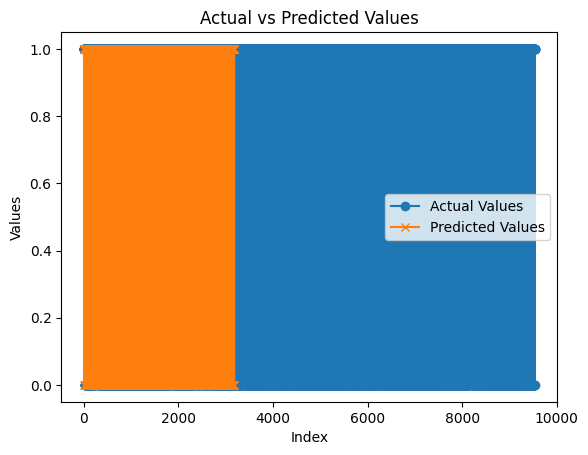

In [295]:
# Create a line plot
plt.plot(y_train, label='Actual Values', marker='o')
plt.plot(pred, label='Predicted Values', marker='x')

# Add labels and title
plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Actual vs Predicted Values')

# Add a legend
plt.legend()

# Display the plot
plt.show()

In [296]:
# Random Forest Model
rndf = RandomForestClassifier(random_state=98, criterion="log_loss")

In [297]:
# fitting the training data
rndf.fit(X_train, y_train)

RandomForestClassifier(criterion='log_loss', random_state=98)

In [299]:
# predictions
y_pred = rndf.predict(X_test)
print(y_pred[0:5])

[1 1 1 1 1]


In [301]:
accuracies = cross_val_score(estimator=rndf, X=X, y=y, cv=10)
print(accuracies.mean())
print(accuracies.std())

print("Test set classification rate: {}".format(np.mean(pred == y_test)))

1.0
0.0
Test set classification rate: 0.27061044682190055
